In [1]:
import numpy as np
import pandas as pd

import sys
sys.path.append(sys.path[0] + '/../')

import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook

matplotlib.rcParams['figure.figsize'] = (8,6)

import glob,os

In [7]:
# read all meta data

def parameters_from_filename(filename = '', expand_to_list = False):
    fn    = os.path.basename(filename)
    stats = os.stat(filename)
    rdict = {'eigenvalue' : float(fn[8:12]), 'noiseamplitude' : float(fn[14:18]), 'run' : int(fn[20:23]), 'initialsize' : int(fn[25:].split('.')[0]), 'filesize': stats.st_size, 'filename': fn, 'fullfilename' : filename}
    if expand_to_list:
        for key,value in rdict.items():
            rdict[key] = np.array([value])
    return rdict

datadir = '/home/lukas/projects/growthratedifferences/simulations/191105_testing/1d/'
datafiles = glob.glob(datadir + 'popdyn.*.txt')

datainfo = None

for fn in datafiles:
    p = parameters_from_filename(fn,expand_to_list=True)
    if p['filesize'] > 0:
        if datainfo is None:
            datainfo = pd.DataFrame(p)
        else:
            datainfo = datainfo.append(pd.DataFrame(p), ignore_index = True)

# print(datainfo)

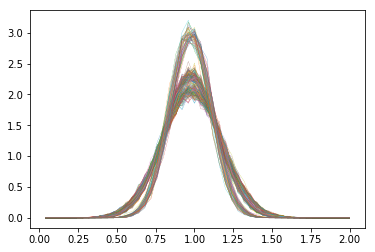

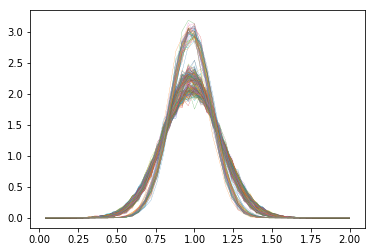

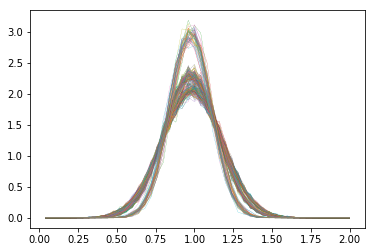

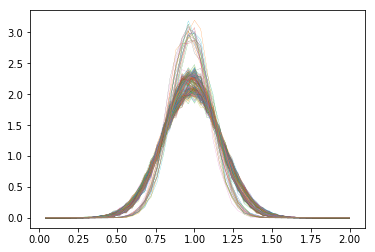

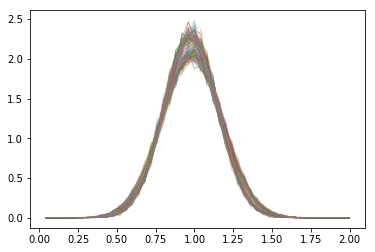

In [30]:
for idx_noiseamplitude in range(5):
    noiseamplitude = (1+idx_noiseamplitude)*.25
    for idx_eigenvalue in range(3):
        eigenvalue = (1+idx_eigenvalue)*.25
    
        for filename in (datainfo.loc[(datainfo['eigenvalue'] == eigenvalue) & (datainfo['noiseamplitude'] == noiseamplitude)])['fullfilename']:
            try:
                curdata = np.genfromtxt(filename)
                h,b = np.histogram(curdata[:,1],range = (0,2),bins = 50,density = True)
                plt.plot(b[:-1] + np.diff(b),h, linewidth = .2)
            except:
                continue
    plt.show()